In [74]:
!/opt/homebrew/bin/wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

File ‘all_stocks_5yr.csv’ already there; not retrieving.



In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv('all_stocks_5yr.csv',parse_dates=True)
sbux=df[df['Name']=='SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


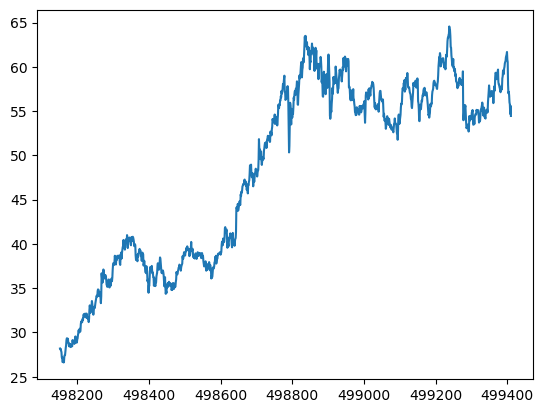

In [77]:
sbux['close'].plot();

In [78]:
sbux['prev_close']=sbux['close'].shift(1)


In [79]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [80]:
sbux['return']=sbux['close']/sbux['prev_close']-1

In [81]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [82]:
sbux['return2']=sbux['close'].pct_change(1)

In [83]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<Axes: >

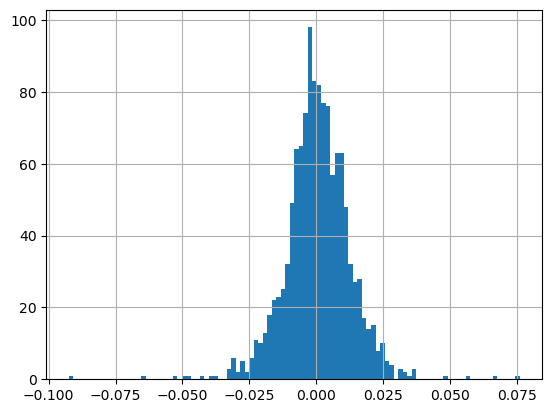

In [84]:
sbux['return'].hist(bins=100)

In [85]:
sbux['return'].mean(),sbux['return'].std()

(0.0006002332205830914, 0.012360934026133882)

In [86]:
sbux['log_return']=np.log(sbux['return']+1)

In [87]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<Axes: >

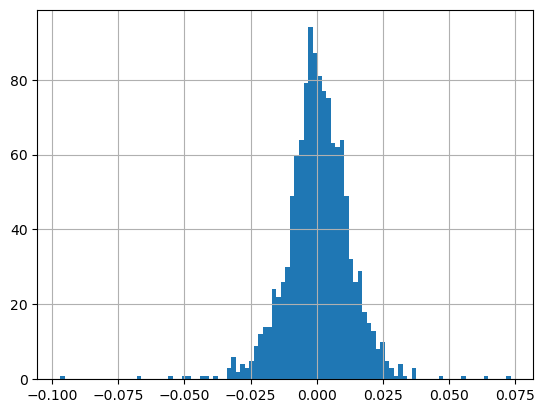

In [88]:
sbux['log_return'].hist(bins=100)

In [89]:
sbux['log_return'].mean(),sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101253)

NORMAL DISTRIBUTION

In [90]:
from scipy.stats import norm

In [91]:
x_list=np.linspace(sbux['return'].min(),sbux['return'].max(),100)

In [92]:
y_list=norm.pdf(x_list,loc=sbux['return'].mean(),scale=sbux['return'].std())


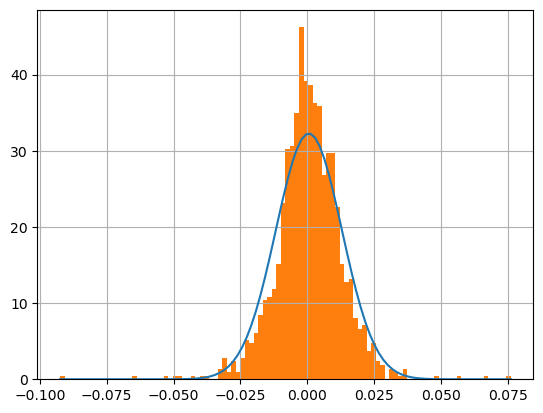

In [93]:
plt.plot(x_list,y_list);
sbux['return'].hist(bins=100,density=True);


In [94]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (0.012069021175478518, 0.0006002332205830934, 0.9745536080830219))

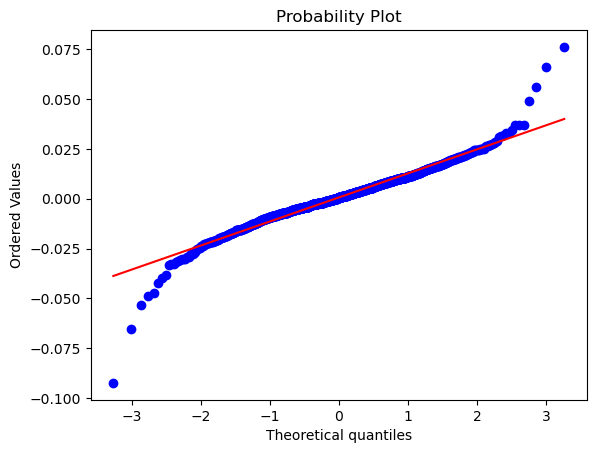

In [95]:
probplot(sbux['return'].dropna(),dist=norm,fit=True,plot=plt)


In [96]:
import statsmodels.api as sm

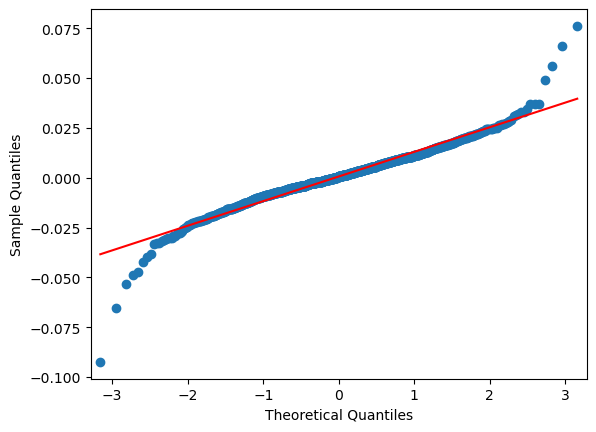

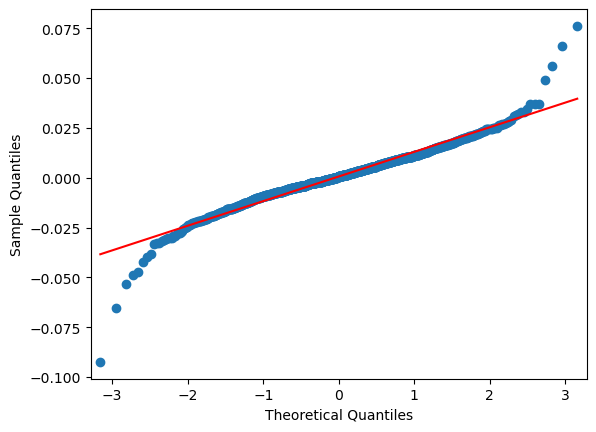

In [97]:
sm.qqplot(sbux['return'].dropna(),line='s')

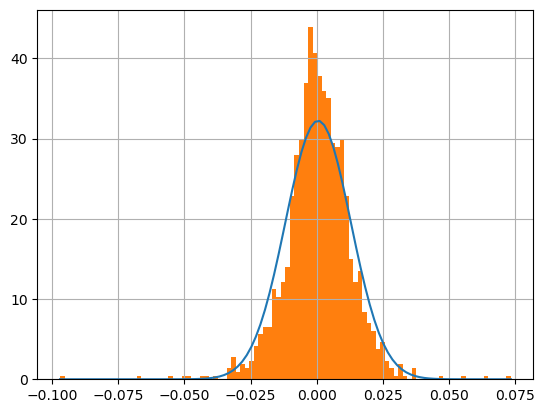

In [98]:
x_list = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
y_list = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

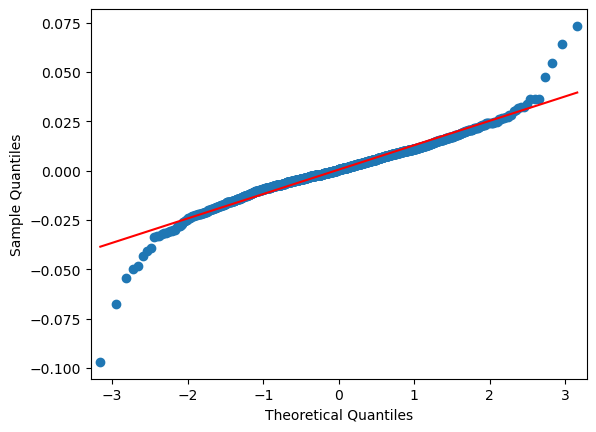

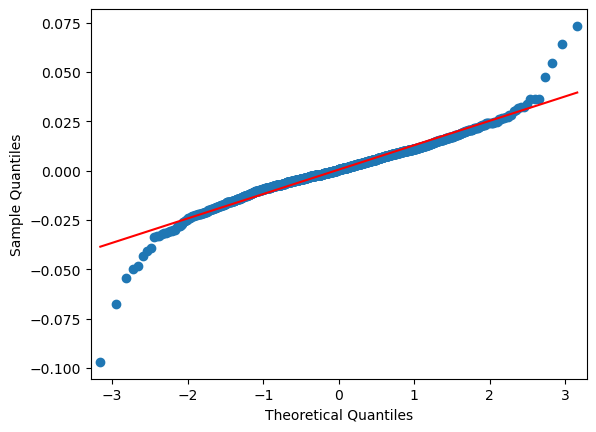

In [99]:
sm.qqplot(sbux['log_return'].dropna(),line='s')

T-DISTRIBUTION

In [100]:
from scipy.stats import t

In [101]:
x_list= np.linspace(sbux['return'].min(),sbux['return'].max(),100)

In [102]:
params=t.fit(sbux['return'].dropna())

In [103]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [104]:
df,loc,scale=params

In [105]:
y_list=t.pdf(x_list,df=df,loc=loc,scale=scale)

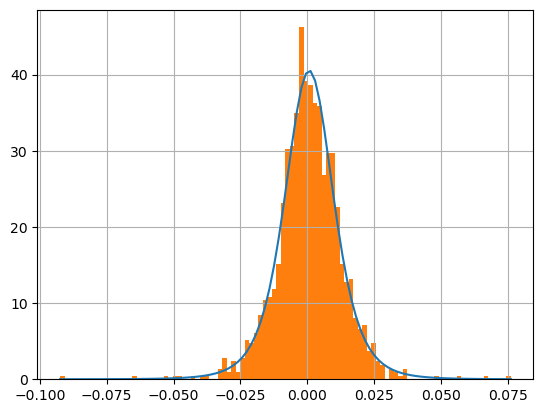

In [106]:
plt.plot(x_list,y_list);
sbux['return'].hist(bins=100,density=True);

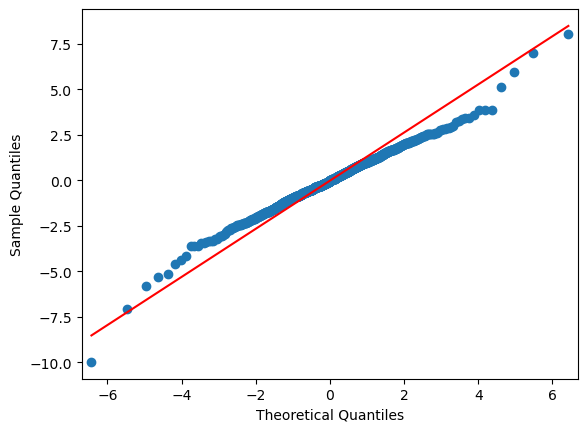

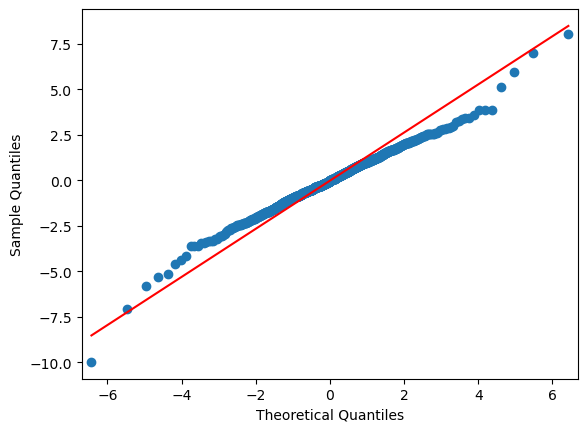

In [107]:
sm.qqplot(sbux['return'].dropna(),dist=t,fit=True,line='s')

In [108]:
probplot(sbux['return'].dropna(),dist='t',fit=True,plot=plt)#_parse_args() missing 1 required positional argument: 'df'

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [ ]:
class myt:
    def __init__(self,df):
        self.df=df
    def fit(self,x):
        return t.fit(x)
    def ppf(self,x,loc=0,scale=1):
        return t.ppf(x,self.df,loc,scale)
    
#back this up

In [ ]:
sm.qqplot(sbux['return'].dropna(),dist=myt(df) ,line='s') 

In [ ]:
x_list= np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)

In [ ]:
params=t.fit(sbux['log_return'].dropna())

In [109]:
df,loc,scale=params
y_list=t.pdf(x_list,df=df,loc=loc,scale=scale)

In [110]:
sm.qqplot(sbux['log_return'].dropna(),dist=myt(df),fit=True,line='s')



NameError: name 'myt' is not defined

Skew and Kurtosis

In [111]:
sbux['return'].skew(),sbux['return'].kurtosis()

(-0.2680784195824153, 5.593158903424731)

In [112]:
sbux['log_return'].skew(),sbux['log_return'].kurtosis()
sbux['log_return'].kurtosis()

5.964502225799283

In [113]:
qq=sm.qqplot(sbux['log_return'].dropna(),dist=myt(df),fit=True,line='s')

NameError: name 'myt' is not defined

Confidence Interval

In [114]:
values=sbux['log_return'].dropna().to_numpy()


In [115]:
m=values.mean()
s=values.std()

In [116]:
m,s

(0.0005235902748108682, 0.012376312238480363)

In [117]:
lower=m-1.96*s/np.sqrt(len(values))
upper=m+1.96*s/np.sqrt(len(values))


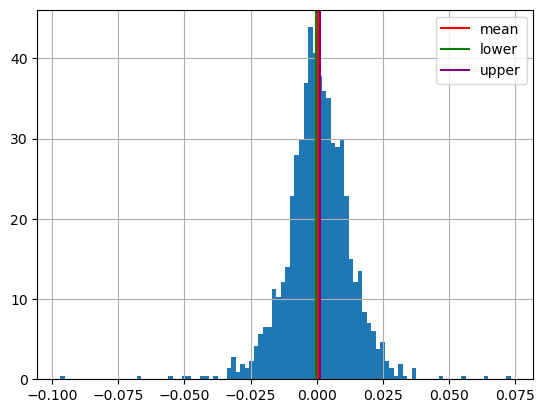

In [118]:
sbux['log_return'].hist(bins=100,density=True);
plt.axvline(m,label='mean',color='red');
plt.axvline(lower,label='lower',color='green');
plt.axvline(upper,label='upper',color='purple');
plt.legend();

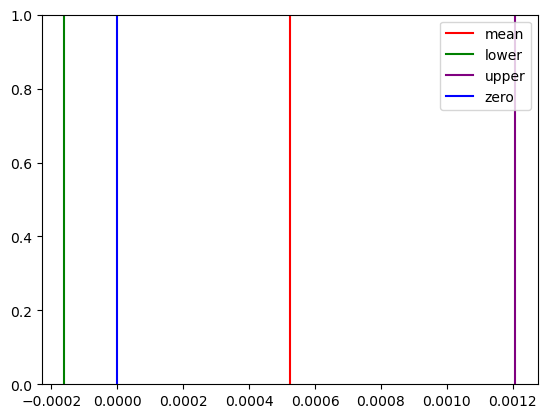

In [119]:
plt.axvline(m,label='mean',color='red');
plt.axvline(lower,label='lower',color='green');
plt.axvline(upper,label='upper',color='purple');
plt.axvline(0,label='zero',color='blue');
plt.legend();

Statistical Testing

In [120]:
from scipy.stats import jarque_bera, normaltest

In [121]:
jarque_bera(values)

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [122]:
normaltest(values)

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [123]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [125]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [127]:
from scipy.stats import kstest

In [ ]:
#It is done